**CodSoft DataScience Internship**

**Task 5 - CREDIT CARD FRAUD DETECTION**

Credit card fraud is a major problem that affects millions of users and financial institutions. Detecting fraud is challenging because the dataset is highly imbalanced, with very few fraudulent transactions compared to genuine ones. In this project, machine learning models such as Logistic Regression and Random Forest are used to identify fraud. The data is preprocessed, normalized, and balanced using SMOTE to improve model accuracy. Evaluation metrics like precision, recall, F1-score, and confusion matrix help measure the model’s performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("creditcard.csv")

print("Dataset Loaded Successfully!\n")
print("First 5 Rows:")
df.head()

Dataset Loaded Successfully!

First 5 Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print("\n====================")
print("DATASET INFORMATION")
print("====================")

print("\nShape of Dataset:", df.shape)



DATASET INFORMATION

Shape of Dataset: (3973, 31)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
print("\nClass Distribution (0 = Genuine, 1 = Fraud):")
print(df['Class'].value_counts())

fraud_count = df['Class'].value_counts()[1]
genuine_count = df['Class'].value_counts()[0]

print(f"\nNumber of Fraud Transactions: {fraud_count}")
print(f"Number of Genuine Transactions: {genuine_count}")


Class Distribution (0 = Genuine, 1 = Fraud):
Class
0.0    3970
1.0       2
Name: count, dtype: int64

Number of Fraud Transactions: 2
Number of Genuine Transactions: 3970


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]


df_cleaned = df.dropna()
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]

scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X["Amount"].values.reshape(-1, 1))
X["Time"] = scaler.fit_transform(X["Time"].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining and Testing Split Done!")


Training and Testing Split Done!


In [ ]:
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE - Fraud Count:", int(sum(y_train_resampled)))
print("After SMOTE - Genuine Count:", int(len(y_train_resampled) - sum(y_train_resampled)))


After SMOTE - Fraud Count: 3175
After SMOTE - Genuine Count: 3175


In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_resampled, y_train_resampled)

rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

print("\nModels Trained Successfully!")


Models Trained Successfully!


In [ ]:
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("\n====================")
print("LOGISTIC REGRESSION")
print("====================")
print(classification_report(y_test, log_pred))
log_cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
print(log_cm)


LOGISTIC REGRESSION
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00       795
   macro avg       0.50      0.50      0.50       795
weighted avg       1.00      1.00      1.00       795

Confusion Matrix:
[[794   1]
 [  0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


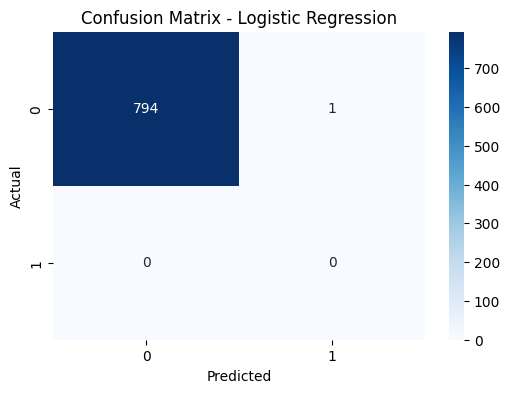

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("\n====================")
print("RANDOM FOREST MODEL")
print("====================")
print(classification_report(y_test, rf_pred))
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(rf_cm)


RANDOM FOREST MODEL
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795

Confusion Matrix:
[[795]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


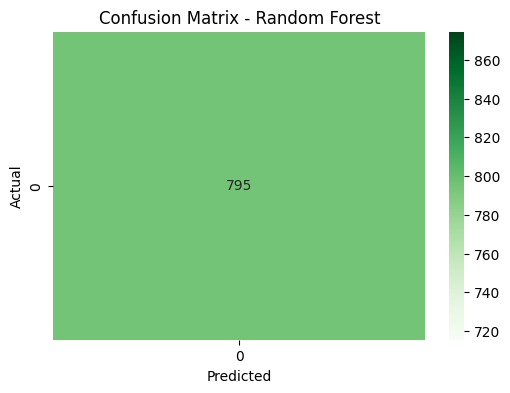

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This project successfully builds a machine learning model to detect fraudulent credit card transactions. By handling imbalance and applying proper preprocessing, the models achieved strong performance in identifying fraud. The results show that machine learning is an effective tool for improving transaction security. Further improvements can include tuning the model, using advanced algorithms, or applying deep learning techniques.